# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
%matplotlib inline
import math

## Problem 1: Is body temperature normally distributed?
**Null Hypothesis**: The temperature distribution is normally distributed.
<br>
**Alternate Hypothesis**: The temperature distribution is not normally distributed.

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, (n + 1)) / n

    return x, y

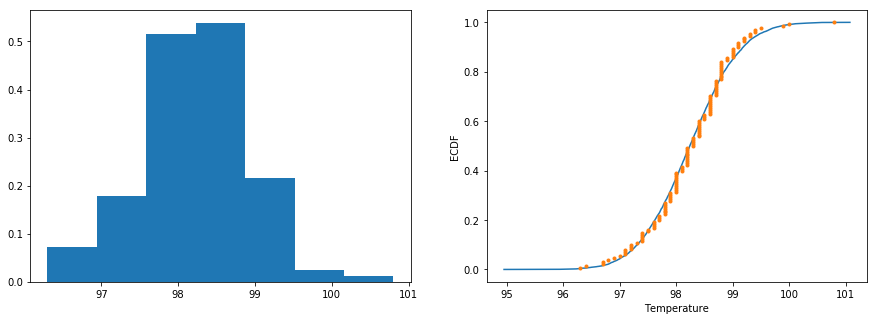

In [4]:
mean = df['temperature'].mean()
sigma = df['temperature'].std()
samples = np.random.normal(mean, sigma, size=10000)
x_theor, y_theor = ecdf(samples)
x_temp, y_temp = ecdf(df['temperature'])

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
_ = plt.hist(df['temperature'], bins=7, normed=True)
plt.subplot(1,2,2)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')
plt.show()

Based on the graphs above, the data looks semi-normal according to the histogram. The cumulative distribution function of the empirical data and the theoretical data show that the data looks normal. However, the appearance of the data is not sufficient to determine if a distribution is normal. A hypothesis test needs to be performed.

In [5]:
skew, p_value = stat.normaltest(df['temperature'])
p_value

0.2587479863488254

The null hypothesis in this test is that the temperature column of the dataset is normally distributed and the alternate hypothesis is that the data are not normally distributed. The p-value of the test is fairly large (.259) meaning that we cannot reject the null hypothesis that the temperature is normally distributed.

## Problem 2: Is the sample size large? Are the observations independent?

The sample size of the data is 130. According to some statisticians, the number of samples should be more than 30 or so. 
<br>
<br>
The data seem to be independent because the rows seem like they are temperatures taken from different people.

## Problem 3: Is the true population mean really 98.6 degrees F?
**Would you use a one-sample or two-sample test? Why?**
<br>
**Answer**: I would use a one-sample test of the mean because we are checking whether the true population mean is 98.6 degress F. The test would be a two sided test.

**Null Hypothesis**: $mu$ = 98.6
<br>
**Alternative Hypothesis**: $mu$ =\= 98.6
<br>
alpha = 0.05

**In this situation, is it appropriate to use the  t  or  z  statistic?**
<br>
In this situation, we will use the t statistic because the true population standard deviation is not known despite the sample size being large enough for the z statistic.

In [6]:
mean

98.24923076923078

In [7]:
t_diff = mean - 98.6
se = sigma / math.sqrt(130)
t_stat = t_diff / se
t_stat

-5.454823292364079

In [8]:
p_value = stat.t.sf(np.abs(t_stat), 129)*2

The p-value in this case is less than the alpha value of 0.05 so we reject the null hypothesis that the population mean is equal to 98.6.

**Now try using the other test. How is the result be different? Why?**

In [9]:
z_diff = mean - 98.6
se = sigma / math.sqrt(130)
z_score = z_diff / se
z_score

-5.454823292364079

In [10]:
p_value = stat.norm.sf(abs(z_score))*2
p_value

4.9021570141133797e-08

In this case, the p_value is lower than the t statistic because the t distribution has fatter tails than the regular normal distribution meaning that there's a higher probability 

## Problem 4: At what temperature should we consider someone's temperature to be "abnormal"?
The first thing to do is to calculate the margin of error for the data. This is the standard deviation divided by the square root of the number of samples (130).

In [11]:
standard_error = sigma / math.sqrt(130)
print('The margin of error for the data is ' + str(2*standard_error))

The margin of error for the data is 0.12860883367578202


The next thing to do is to get the confidence interval of the population mean.

In [12]:
ci_95 = stat.t.interval(0.95, 129, loc=mean, scale=standard_error)
ci_95

(98.122002905608042, 98.376458632853513)

## Problem 5: Is there a significant difference between males and females in normal temperature?

Null Hypothesis: $mu1$ - $mu2$ = 0
<br>
Alternative Hypothesis: $mu1$ =\= $mu2$
<br>
alpha = 0.05

In [16]:
men = df[df['gender'] == 'M'].reset_index()
women = df[df['gender'] == 'F'].reset_index()

mean_men = men['temperature'].mean()
mean_women = women['temperature'].mean()

standard_error = (men['temperature'].var()/len(men)) + (women['temperature'].var()/len(women))
std_error = np.sqrt(standard_error)

mean_diff = mean_men - mean_women

t_score = (mean_diff - 0) / std_error
t_score

-2.2854345381652741

In [14]:
p_val = stat.t.sf(np.abs(t_score), 129)*2
p_val

0.023919004519477989

The p-value is less than the alpha value of 0.05 meaning the null hypothesis is rejected. This means that there is a difference between the mean temperatures of men and women.